In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
# from pprint import pprint as p
# p(sys.path)

<h3>CogSci 131 Spring '20<br></h3>
    <hr>
    <br>
<h1>Making calculations on uncertainty and information search over words in English language
</h1><br>
<subtitle>Yi Chua</subtitle>  

<br> 
I will be doing some information-theoretic calculations on the English language using a dictionary of words as outcomes and frequencies we will assume are proportional to $P(word)$. That is, the distribution considered is: $$P(word)=\frac{\text{frequency word}}{\sum \text{words frequencies}}$$

<h2>Guessing English Words with 20 Questions!</h2>

20 questions is a game between 2 players, a questioner and an answerer. In this scenario, the answerer would choose a word while not revealing it to the questioner. The game is simple, each turn the questioner would ask questions and the answerer would respond with either a yes or no. The questioner would strategically ask questions that would improve his/her chance of winning the game, but using no more than 20 questions.

Let's see what the odds are for the answerer to win 20 questions by calculating the entropies over words in American English in two scenarios:  
<br>
a) frequency of the words  
b) number of words in the data set.

#### a) conditioning on the frequency of the words

In [ ]:
dict_of_words = pd.read_csv('WordFrequenciesdat.csv', header = None, names = ['words', 'frequency'])

sum_of_wfreq = np.sum(dict_of_words['frequency'])

dict_of_words['p(word)'] = dict_of_words['frequency'] / sum_of_wfreq

In [ ]:
#column with computed surprisal
dict_of_words['surprisal'] = - np.log2( dict_of_words['p(word)'])

#column with computed code length
dict_of_words['code length'] = dict_of_words['p(word)'] * dict_of_words['surprisal']

#first 10 rows of data frame 
dict_of_words.head(5)

,words,frequency,p(word),surprisal,code length
0,i,152884,0.039609,4.658022,0.184500
1,and,128635,0.033327,4.907176,0.163540
2,the,123648,0.032035,4.964221,0.159027
3,you,106042,0.027473,5.185824,0.142472
4,it,99341,0.025737,5.279998,0.135893


In [ ]:
#entropy of english 
entropy = np.sum(dict_of_words['code length'])
entropy

8.938139929022174

> The entropy over words in English is $\text{8.938 bits}$ of information.

### Is the game “20 questions” is a fair game in *scenario a*?
- Can a player win more than half the time—assuming the word being guessed is chosen **according to frequency**?

> Assuming if the words being guessed are chosen according to frequency, about 9 bits of information (or 9 questions) are needed to determine which word is referred to, therefore, it seems like a fair game.

#### b) conditioning on the total number of words in the data set
where $P(word)=\frac{1}{\text{number of words in data set}}$ 

In [ ]:
#duplicate dataframe dict_of_words
dict_of_words2 = dict_of_words

#remove preexisitng columns
dict_of_words2 = dict_of_words2.drop(columns=['p(word)', 'surprisal', 'code length'])

#add column with uniform probability
dict_of_words2['p(word)'] = 1 / dict_of_words2.shape[0]

#add column with computed surprisal
dict_of_words2['surprisal'] = - np.log2( dict_of_words2['p(word)'])

#add column with computed code length
dict_of_words2['code length'] = dict_of_words2['p(word)'] * dict_of_words2['surprisal']

#first 5 rows of the updated data frame 
dict_of_words2.head()

,words,frequency,p(word),surprisal,code length
0,i,152884,0.000024,15.339502,0.00037
1,and,128635,0.000024,15.339502,0.00037
2,the,123648,0.000024,15.339502,0.00037
3,you,106042,0.000024,15.339502,0.00037
4,it,99341,0.000024,15.339502,0.00037


In [ ]:
#entropy of English given that if words are chosen uniformly
print("entropy:" + str(np.sum(dict_of_words2['code length'])))

#### Is the game “20 questions” is a fair game in  *scenario b*?
- Can a player win more than half the time—assuming the word being guessed is chosen **uniformly**? 

> If the words are chosen uniformly, then the game '20 questions' is not fair because most of the time, the player requires $\textbf{15.34 bits}$ of information or about 15 or 16 questions to determine which word is being referred to, therefore, the player would likely to lose game.

<h2 style="page-break-before: always;">How many bits of information will a person need to guess a word if they are given the first character?</h2>

To answer this question, I will calculte the conditional entropy over words in English conditioning on the first character of each word.

In [ ]:
#update original dataframe by removing unneeded columns
dict_of_words = dict_of_words.drop(columns=['surprisal', 'code length'])

#added a new column with first lettter of word
dict_of_words['first letter'] = dict_of_words['words'].astype(str).str[0] 

#function to calculate entropy of each character
def entropy(p):
    total = 0
    for prob in p:
        total += prob * (- np.log2(prob))
    return(total)


characters = ['a','b','c','d','e','f','g','h','i','j','k','l','m',
              'n','o','p','q','r','s','t','u','v','w','x','y','z']

              
characters_count = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e':0, 'f': 0, 
                    'g': 0, 'h': 0, 'i': 0, 'j':0,'k': 0, 'l': 0, 
                    'm': 0, 'n':0, 'o': 0, 'p': 0, 'q': 0, 'r':0, 
                    's': 0, 't': 0, 'u': 0, 'v':0, 'w': 0, 'x': 0, 
                    'y': 0, 'z':0}

#storing entropy values for each character
conditional_entropy = []
for c in characters:
    sumprob = 0
    sumprob_list = []
    for f in np.arange(dict_of_words.shape[0]):
        if c == (dict_of_words['first letter'])[f]:
            sumprob += dict_of_words['p(word)'][f]
            characters_count[c] +=1 
    for g in np.arange(dict_of_words.shape[0]):
        if c == (dict_of_words['first letter'])[g]:
            sumprob_list.append((dict_of_words['p(word)'])[g] / sumprob)
    conditional_entropy.append(entropy(sumprob_list))

####  Visualization

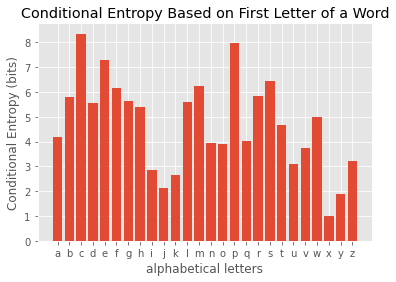

In [ ]:
plt.style.use('ggplot')
plt.bar(characters, conditional_entropy)
plt.xlabel('alphabetical letters')
plt.ylabel('Conditional Entropy (bits)')
plt.title('Conditional Entropy Based on First Letter of a Word')
plt.show()

In [ ]:
# total count for each word's first character/letter
print(characters_count)

{'a': 2490, 'b': 2396, 'c': 4018, 'd': 2447, 'e': 1694, 'f': 1868, 'g': 1256, 'h': 1556, 'i': 1498, 'j': 441, 'k': 439, 'l': 1413, 'm': 2231, 'n': 985, 'o': 1081, 'p': 3219, 'q': 167, 'r': 2501, 's': 4662, 't': 2259, 'u': 765, 'v': 587, 'w': 1203, 'x': 23, 'y': 171, 'z': 90}


> Here is a noticeable pattern:   <br>
<br>
> the more words that begin with the character, more information is needed to guess a word e.g. 'c', 'p' and the other way around where less information is needed for words that have less words that beign with the character e.g. 'x'.<br>
<br>
>However, this is only a minor influence at play, because we see words there are more words that begin with 'd' than 'e', but words that begin with 'e' requires more information to uncover the word completely. But given the first character of the word, some characters will give more information initially which allows the person to uncover the word quicker than other characters. It seems there are extra variables at play.

## Word Identity

Guessing letters can help a person uncover the word, but guessing them strategically can reveal more information than guessing it randomly. But, how much of a word's identity is solely reveal based on the position of the character or having a vowel/consonant?

I'll be calculating **mutual information** based on three conditions: 

- first character
- last character
- first vowel 

#### a) first character 

In [ ]:
mutual_info_firstletter = 0 
conditional_entropy_first_letter = []
characters = ['a','b','c','d','e','f','g','h','i','j','k','l','m',
              'n','o','p','q','r','s','t','u','v','w','x','y','z']
each_letter_sump = []
for c in characters:
    sumprob = 0
    sumprob_list = []
    for f in np.arange(dict_of_words.shape[0]):
        if c == (dict_of_words['first letter'])[f]:
            sumprob += dict_of_words['p(word)'][f] 
    for g in np.arange(dict_of_words.shape[0]):
        if c == (dict_of_words['first letter'])[g]:
            sumprob_list.append((dict_of_words['p(word)'])[g] / sumprob)
    conditional_entropy_first_letter.append(entropy(sumprob_list))
    each_letter_sump.append(sumprob)
mutual_info_firstletter = entropy(dict_of_words['p(word)'])

for i in range(len(conditional_entropy_first_letter)):
    mutual_info_firstletter -= each_letter_sump[i] * conditional_entropy_first_letter[i]
    
print("mutual info for first letter: " + str(mutual_info_firstletter))


mutual info for first letter: 4.189824469064531


#### 2) the last character  

In [ ]:
#updating df by adding a column final letter in the word
dict_of_words['last letter'] = dict_of_words['words'].astype(str).str[-1]

mutual_info_lastletter = 0 
conditional_entropy_last_letter = []
characters = ['a','b','c','d','e','f','g','h','i','j','k','l','m',
              'n','o','p','q','r','s','t','u','v','w','x','y','z']
each_letter_sump = []
for c in characters:
    sumprob = 0
    sumprob_list = []
    for f in np.arange(dict_of_words.shape[0]):
        if c == (dict_of_words['last letter'])[f]:
            sumprob += dict_of_words['p(word)'][f] 
    for g in np.arange(dict_of_words.shape[0]):
        if c == (dict_of_words['last letter'])[g]:
            sumprob_list.append((dict_of_words['p(word)'])[g] / sumprob)
    conditional_entropy_last_letter.append(entropy(sumprob_list))
    each_letter_sump.append(sumprob)
mutual_info_lastletter = entropy(dict_of_words['p(word)'])

for i in range(len(conditional_entropy_last_letter)):
    mutual_info_lastletter -= each_letter_sump[i] * conditional_entropy_last_letter[i]
    
print("mutual information for last letter: " + str(mutual_info_lastletter))

mutual information for last letter: 3.8987337024307105


#### 3) the first vowel (aeiou)

In [ ]:
mutual_info_firstvowel = 0
conditional_entropy_firstvowel = []
num_of_words = len(dict_of_words)
vowels_word_prob = {'a': 0, 'e': 0, 'i': 0, 'o': 0, 'u':0}
vowels_word_count = {'a': 0, 'e': 0, 'i': 0, 'o': 0, 'u':0}
vowels = ['a','e','i','o','u']

for v in vowels:
    for row in range(num_of_words):
        for word in str(dict_of_words.iloc[row,0]):
            for letter in word:
                if (letter in vowels) and (letter == v):
                    vowels_word_prob[letter] += dict_of_words.iloc[row,2]
                    vowels_word_count[letter] += 1
                    break
                else:
                    if (letter in vowels) and (letter != v):
                        break
            else:
                break           
for v in vowels:
    sum_problist = []
    for row in range(num_of_words):
        for word in str(dict_of_words.iloc[row, 0]):
            for letter in word:
                if (letter in vowels) and (letter == v):
                        p_word = dict_of_words.iloc[row,2]
                        sum_problist.append(p_word / vowels_word_count[letter])
                        break
                else:
                    if (letter in vowels) and (letter != v):
                        break
            else:
                break
    conditional_entropy_firstvowel.append(entropy(sum_problist))
mutual_info_firstvowel = entropy(dict_of_words['p(word)'])

for i in range(len(conditional_entropy_firstvowel)):
    mutual_info_firstvowel -= vowels_word_count[vowels[i]] * conditional_entropy_firstvowel[i]

print("mutual info for first vowel: " + str(mutual_info_firstvowel))   
        

mutual info for first vowel: 3.206682938333398


#### Visualizaiton

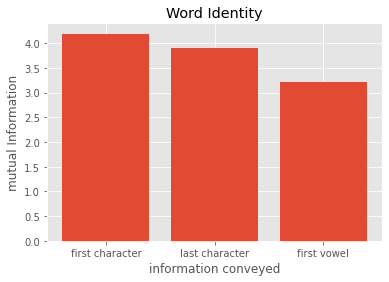

In [ ]:
mutual_info = [mutual_info_firstletter, mutual_info_lastletter, mutual_info_firstvowel]

plt.style.use('ggplot')
plt.bar(['first character', 'last character', 'first vowel'],mutual_info)
plt.ylabel('mutual Information')
plt.xlabel('information conveyed')
plt.title('Word Identity')
plt.show()

> After the calculations, I would predict the first character is most important for a word recognition because as reflected by the plot, it possesses the highest mutual information which allows an individual to have **the most reduction in the uncertainty** of the word identity that is being conveyed. But it seems, as long as a person is given a character in certain position, s/he is likely to uncover the identity of the words.

## The length of the word might (or might not) surprise you ! 

We can consider the length of the word and calculate the average amount of self-information an observer would expect to gain about the variable when measuring it.

The assumptions are the following, according to Shannon Claude:
- as length of words increase, the probability of the event would decrease, and as a result, we would be more surprised as larger amount of information.
- an event with the probability of 1 is not surprising and yields no information.

That means for American English words that are frequently used, we expect to have efficient codes for them therefore they would have shorter code lengths. 

In [ ]:
def surprisal(p):
    total = 0
    length = 0
    if len(p) == 0:
        return(total)
    else:
        for prob in p:
            total+= (- np.log2(prob))
            length += 1
        return(total / length)



max_length = 0
for word in dict_of_words['words']:
    current = len(str(word))
    if current > max_length:
        max_length = current

average_surprisal = []
for l in range(max_length):
    sumprob = 0
    p_x_d = []
    count = 0
    for word in dict_of_words['words']:
        if len(str(word)) == l:
            sumprob += dict_of_words['p(word)'][count]
        count += 1
    count = 0
    for word in dict_of_words['words']:
        if len(str(word)) == l:
            p_x_d.append(dict_of_words['p(word)'][count] / sumprob)
        count += 1
    average_surprisal.append(entropy(p_x_d))

#### Visualization

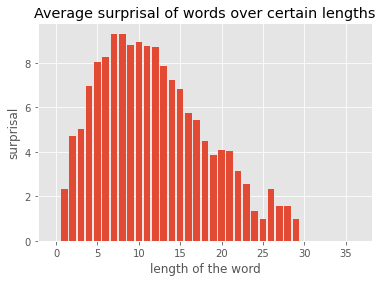

In [ ]:
plt.style.use('ggplot')
plt.bar(np.arange(max_length),average_surprisal)
plt.xlabel('length of the word')
plt.ylabel('surprisal')
plt.title('Average surprisal of words over certain lengths')
plt.show()

>However, it seems that we're definitely in for a surprise. If English were an efficient code in Shannon's sense, the plot would've been positive and linear; however that is not the case. 
 - Where my plot agrees with Shannon sense is when the word length is $0$ because it has a probability of 1 occurring thus we should not be surprised about it.
 - The rest of the plot does not agree with Shannon sense as an efficient code because I expected more probable events like the word length of three would have shorter codewords thus the average surprisal should be lower. It seems the average surprisal seem to be "efficient" as the length of the word increase up until word lengths are about 7 and 8. But, then we see the trend juxtaposes our initial intuition because the average surprisal seem to decrease as the length of the word increase.  
 
>Overall, I conclude English is not an efficient code in Shannon sense after it reaches a certain word length. 

## Recap and final remarks  

I was able to conduct some information-calculations over the English language using a dictionary of words.  
> - A player would have better odds of winning 20 Questions if the words being guessed are frequently used versus if the words used has the same probability as an uncommon word. 
> - If a player is given the first character of the word, depending on the character, the player might need a bit or a lot more information to guess the right word.
> - It turns out, the first character gives the most information about a word identity. But, the word's final character and the first vowel can reveal almost as much information!
> - English language is not efficient code in Shannon sense since the average surprisal were higher for shorter length of the words and lower for longer length of the words.  

Of course, this overall analysis is based on a dictionary of words which most frequent words may not be optimized since it is more generalized than individualized. There are a lot of attributes that make up how words are used, which can be further investigated on the microlevel such as the structure of the word itself to a macrolevel where the words are used in a social setting.

<hr>

#### Acknowledgement

$\scriptsize{\text{   Piantadosi, Steven. "Information I." CogSci 131 Computational Modeling in Cognition. 14 April 2020, University of California, Berkeley. Class lecture.}}$
$\scriptsize{\text{   Piantadosi, Steven. "Information II." CogSci 131 Computational Modeling in Cognition. 16 April 2020, University of California, Berkeley. Class lecture.}}$
$\scriptsize{\text{   Piantadosi, Steven. "Dictionary of Words: English Language (data set)". CogSci 131 Computational Modeling in Cognition. 16 April 2020, University of California, Berkeley. <http://colala.berkeley.edu/>}}$